In [1]:
#!/usr/bin/python3

#import pypyodbc
#import urllib
import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import mplfinance as mpf
#import matplotlib.dates as mpdates


url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval=5min&outputsize=full&apikey=QRNX49EZGZKYUACF&datatype=csv"
response = requests.get(url)


In [2]:
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))
df_for_graph=df

In [3]:
df=df.assign(Currency= "GBPUSD")
df=df.assign(TimeFrame= "5Min")



In [4]:
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

In [5]:
df.head()

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-03 17:15:00,1.11827,1.11852,1.11764,1.11830,GBPUSD,5Min,2022-11-03,17:15:00
1,2022-11-03 17:10:00,1.11834,1.11864,1.11740,1.11831,GBPUSD,5Min,2022-11-03,17:10:00
2,2022-11-03 17:05:00,1.11835,1.11866,1.11739,1.11833,GBPUSD,5Min,2022-11-03,17:05:00
3,2022-11-03 17:00:00,1.11843,1.11851,1.11730,1.11834,GBPUSD,5Min,2022-11-03,17:00:00
4,2022-11-03 16:55:00,1.11764,1.11863,1.11730,1.11846,GBPUSD,5Min,2022-11-03,16:55:00


In [6]:
df.shape[0]

1000

In [7]:
df2=df[725:800]

In [8]:
df2[740:750]


,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time


In [9]:
df[740:750]

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
740,2022-11-01 03:35:00,1.15047,1.15067,1.14981,1.15036,GBPUSD,5Min,2022-11-01,03:35:00
741,2022-11-01 03:30:00,1.15019,1.15083,1.14974,1.15048,GBPUSD,5Min,2022-11-01,03:30:00
742,2022-11-01 03:25:00,1.15030,1.15066,1.14994,1.15021,GBPUSD,5Min,2022-11-01,03:25:00
743,2022-11-01 03:20:00,1.15020,1.15069,1.15000,1.15033,GBPUSD,5Min,2022-11-01,03:20:00
744,2022-11-01 03:15:00,1.15010,1.15091,1.14986,1.15030,GBPUSD,5Min,2022-11-01,03:15:00
745,2022-11-01 03:10:00,1.15048,1.15053,1.14959,1.15020,GBPUSD,5Min,2022-11-01,03:10:00
746,2022-11-01 03:05:00,1.15120,1.15149,1.15014,1.15050,GBPUSD,5Min,2022-11-01,03:05:00
747,2022-11-01 03:00:00,1.15122,1.15139,1.15022,1.15118,GBPUSD,5Min,2022-11-01,03:00:00
748,2022-11-01 02:55:00,1.15050,1.15137,1.15024,1.15124,GBPUSD,5Min,2022-11-01,02:55:00
749,2022-11-01 02:50:00,1.15082,1.15105,1.15020,1.15057,GBPUSD,5Min,2022-11-01,02:50:00


In [10]:
df3=df


In [11]:
df3['TimeDeta'] = pd.to_timedelta(df3['Time'])
### Convert 'timeColumn' to minutes only.
df3['Day_Time_Index'] = df3['TimeDeta'].dt.total_seconds() / 60

In [12]:
df3.head(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 17:15:00,1.11827,1.11852,1.11764,1.11830,GBPUSD,5Min,2022-11-03,17:15:00,0 days 17:15:00,1035.0
1,2022-11-03 17:10:00,1.11834,1.11864,1.11740,1.11831,GBPUSD,5Min,2022-11-03,17:10:00,0 days 17:10:00,1030.0
2,2022-11-03 17:05:00,1.11835,1.11866,1.11739,1.11833,GBPUSD,5Min,2022-11-03,17:05:00,0 days 17:05:00,1025.0
3,2022-11-03 17:00:00,1.11843,1.11851,1.11730,1.11834,GBPUSD,5Min,2022-11-03,17:00:00,0 days 17:00:00,1020.0
4,2022-11-03 16:55:00,1.11764,1.11863,1.11730,1.11846,GBPUSD,5Min,2022-11-03,16:55:00,0 days 16:55:00,1015.0
5,2022-11-03 16:50:00,1.11704,1.11779,1.11671,1.11764,GBPUSD,5Min,2022-11-03,16:50:00,0 days 16:50:00,1010.0
6,2022-11-03 16:45:00,1.11580,1.11705,1.11573,1.11704,GBPUSD,5Min,2022-11-03,16:45:00,0 days 16:45:00,1005.0
7,2022-11-03 16:40:00,1.11760,1.11776,1.11546,1.11598,GBPUSD,5Min,2022-11-03,16:40:00,0 days 16:40:00,1000.0
8,2022-11-03 16:35:00,1.11772,1.11843,1.11720,1.11774,GBPUSD,5Min,2022-11-03,16:35:00,0 days 16:35:00,995.0
9,2022-11-03 16:30:00,1.11921,1.11928,1.11760,1.11773,GBPUSD,5Min,2022-11-03,16:30:00,0 days 16:30:00,990.0


In [13]:
df3.tail(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
990,2022-10-31 06:45:00,1.15934,1.16005,1.15912,1.16002,GBPUSD,5Min,2022-10-31,06:45:00,0 days 06:45:00,405.0
991,2022-10-31 06:40:00,1.15955,1.15967,1.15902,1.15936,GBPUSD,5Min,2022-10-31,06:40:00,0 days 06:40:00,400.0
992,2022-10-31 06:35:00,1.15930,1.15974,1.15887,1.15958,GBPUSD,5Min,2022-10-31,06:35:00,0 days 06:35:00,395.0
993,2022-10-31 06:30:00,1.15907,1.15952,1.15872,1.15934,GBPUSD,5Min,2022-10-31,06:30:00,0 days 06:30:00,390.0
994,2022-10-31 06:25:00,1.15856,1.15916,1.15834,1.15907,GBPUSD,5Min,2022-10-31,06:25:00,0 days 06:25:00,385.0
995,2022-10-31 06:20:00,1.15953,1.15969,1.15793,1.15849,GBPUSD,5Min,2022-10-31,06:20:00,0 days 06:20:00,380.0
996,2022-10-31 06:15:00,1.15981,1.15994,1.15912,1.15940,GBPUSD,5Min,2022-10-31,06:15:00,0 days 06:15:00,375.0
997,2022-10-31 06:10:00,1.15940,1.15996,1.15911,1.15980,GBPUSD,5Min,2022-10-31,06:10:00,0 days 06:10:00,370.0
998,2022-10-31 06:05:00,1.15931,1.15953,1.15875,1.15945,GBPUSD,5Min,2022-10-31,06:05:00,0 days 06:05:00,365.0
999,2022-10-31 06:00:00,1.15942,1.15946,1.15857,1.15931,GBPUSD,5Min,2022-10-31,06:00:00,0 days 06:00:00,360.0


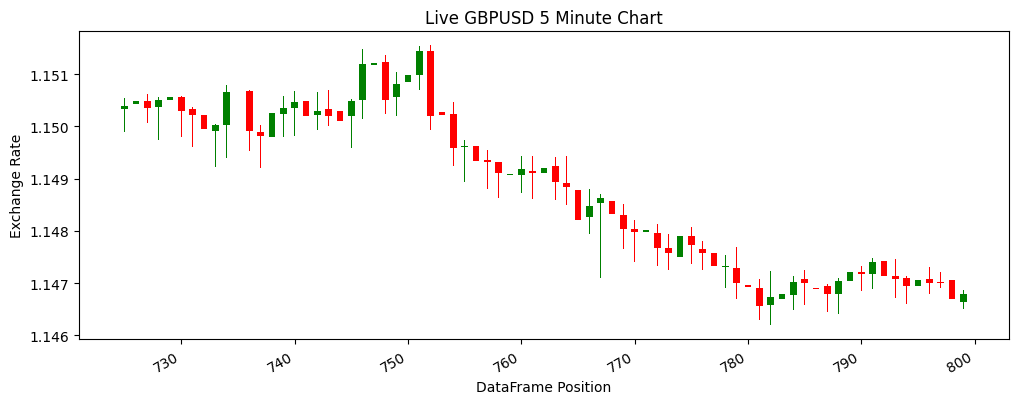

In [15]:
#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df2[df2.close >= df2.open]
down = df2[df2.close < df2.open]

col1 = 'red'
col2 = 'green'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("Live GBPUSD 5 Minute Chart")
plt.xlabel('DataFrame Position')
plt.ylabel('Exchange Rate')
#plt.annotate("Start of Trading Session", xy=(745, 1.1405), xytext=(730, 1.15), arrowprops={"arrowstyle":"->", "color":"blue"})
#plt.annotate("News Event", xy=(795, 1.15), xytext=(780, 1.14), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.plot()
plt.savefig('1min-2.png')
plt.show()

In [21]:
from datetime import datetime 
today = datetime.today()


In [22]:
today

datetime.datetime(2022, 11, 3, 17, 31, 51, 166485)

In [24]:
type(today)


datetime.datetime

In [29]:
dt_iso = datetime.now().isoformat()[0:10]


In [28]:
dt_iso

'2022-11-0'

In [30]:
filt= df["Date"] == datetime.now().isoformat()[0:10]
df4=df.loc[filt]

In [31]:
df4

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 17:15:00,1.11827,1.11852,1.11764,1.11830,GBPUSD,5Min,2022-11-03,17:15:00,0 days 17:15:00,1035.0
1,2022-11-03 17:10:00,1.11834,1.11864,1.11740,1.11831,GBPUSD,5Min,2022-11-03,17:10:00,0 days 17:10:00,1030.0
2,2022-11-03 17:05:00,1.11835,1.11866,1.11739,1.11833,GBPUSD,5Min,2022-11-03,17:05:00,0 days 17:05:00,1025.0
3,2022-11-03 17:00:00,1.11843,1.11851,1.11730,1.11834,GBPUSD,5Min,2022-11-03,17:00:00,0 days 17:00:00,1020.0
4,2022-11-03 16:55:00,1.11764,1.11863,1.11730,1.11846,GBPUSD,5Min,2022-11-03,16:55:00,0 days 16:55:00,1015.0
...,...,...,...,...,...,...,...,...,...,...,...
203,2022-11-03 00:20:00,1.13815,1.13834,1.13777,1.13801,GBPUSD,5Min,2022-11-03,00:20:00,0 days 00:20:00,20.0
204,2022-11-03 00:15:00,1.13791,1.13825,1.13737,1.13818,GBPUSD,5Min,2022-11-03,00:15:00,0 days 00:15:00,15.0
205,2022-11-03 00:10:00,1.13749,1.13802,1.13722,1.13791,GBPUSD,5Min,2022-11-03,00:10:00,0 days 00:10:00,10.0
206,2022-11-03 00:05:00,1.13832,1.13834,1.13722,1.13747,GBPUSD,5Min,2022-11-03,00:05:00,0 days 00:05:00,5.0
